<a href="https://colab.research.google.com/github/Tatis88/ProjetoAplicadoI/blob/main/EDA_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importação dos Dados

Nessa seção será realizado a importação das bibliotecas em python necessárias para realização da análise exploratória da base de usuários da Netflix (kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset), além de realizar o upload da base de dados exportada no formato de .csv

## 1.1 Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Database

In [ ]:
# Carregar o dataset
file_path = 'Netflix Userbase.csv'
df = pd.read_csv(file_path)

# 2. Sanitização e Pré-EDA

Nessa seção será realizado a verificação da base de dados a ser explorada, tendo o foco de verificar: a presença de nulos e a presença de outliers; visando tornar os insights a serem extraídos coerentes e representativos da amostra de dados analisada.

Além disso, faremos uma exploração inicial do dataset, a fim de observar: a estrutura dos dados da amostra e o comportamento estatístico macro das variáveis a serem analisadas.

## 2.1 Presença de Nulos e Outliers

In [ ]:
# Verificar a presença de valores nulos
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


Não há nenhum elemento nulo na base de dados!

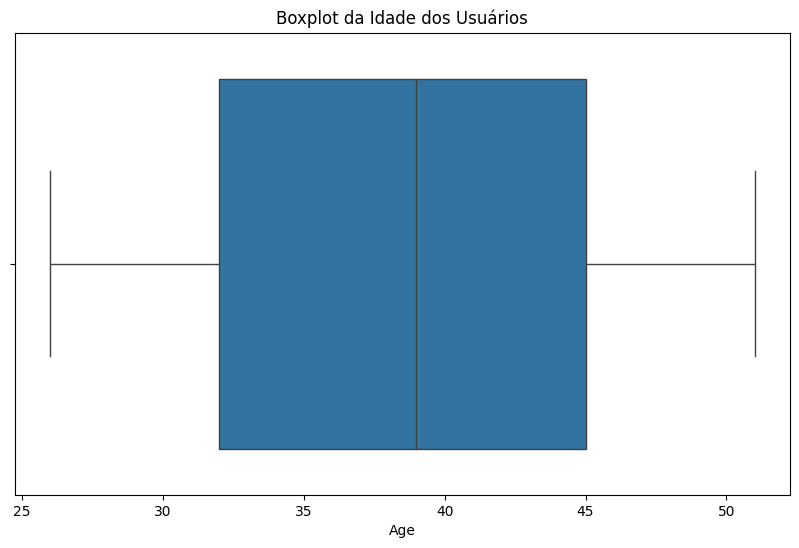

In [ ]:
# Boxplot para verificar outliers na idade
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age')
plt.title('Boxplot da Idade dos Usuários')
plt.show()

- A base de dados não aparenta ter uma quantidade representativa de outliers fora dos extremos de 25 a 50 anos.
- Apresentando uma maior concentração dos dados entre 32 a 45 anos e com uma mediana em 38 anos.

## 2.2 Exploração inicial do Dataset

In [ ]:
# Verificar as primeiras linhas do dataset
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
# Verificar a estrutura do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
# Estatísticas descritivas básicas
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


# 3. Análise Exploratória

Nessa seção será verificada a distribuição dos usuários da Netflix conforme as seguintes segmentações: país, faixa etária e tipo de assinatura.

## 3.1 Análise Univariável

### 3.1.1 Distribuição de usuários por país

**Principais Insights**

- 1) EUA e Espanha se destacam como os países que apresentam o maior volume de usuários assinantes.
- 2) Aparentemente, há uma diferenciação entre os top 3 países em relação aos demais do top 10, de modo que se situam em patamares diferentes de volume de usuários assinantes.

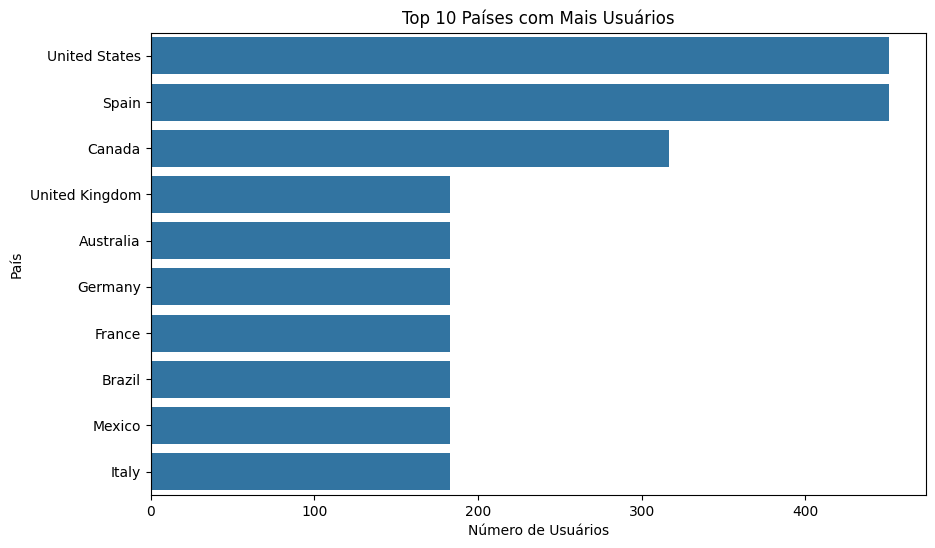

In [ ]:
# Contar a quantidade de usuários por país
user_country_counts = df['Country'].value_counts().head(10)  # Exibir os 10 principais países

# Visualizar os países com mais usuários
plt.figure(figsize=(10,6))
sns.barplot(x=user_country_counts.values, y=user_country_counts.index)
plt.title('Top 10 Países com Mais Usuários')
plt.xlabel('Número de Usuários')
plt.ylabel('País')
plt.show()

### 3.1.2 Distribuição dos usuários por faixa etária

**Principais Insights**

- 1) Observa-se que 50 anos é a idade mais frequente dos usuários assinantes
- 2) Para as demais faixas etárias se observa um comportamento quase uniforme

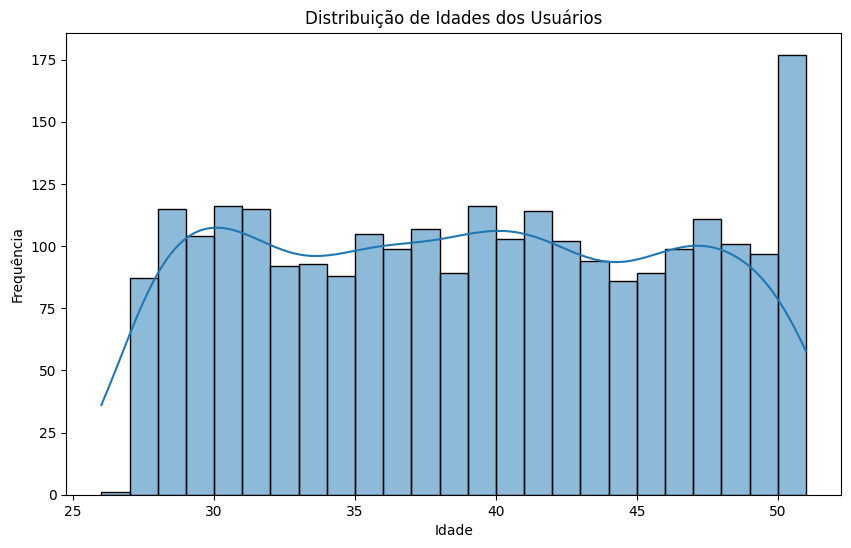

In [ ]:
# Visualizar a distribuição de faixas etárias
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], binwidth=1, kde=True)
plt.title('Distribuição de Idades dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

### 3.1.3 Distribuição de Usuários por Plano de Assinatura

**Principais Insights**

- 1) Plano Básico é o mais assinado entre os usuários
- 2) O plano premium e o plano standard apresentam uma quantidade de usuários semelhante (de modo que podemos dizer que(ESCREVER O QUE FOI OBSERVADO NO GRÁFICO ABAIXO)

<ipython-input-15-fc9189b8b607>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Subscription Type', palette="Set2")


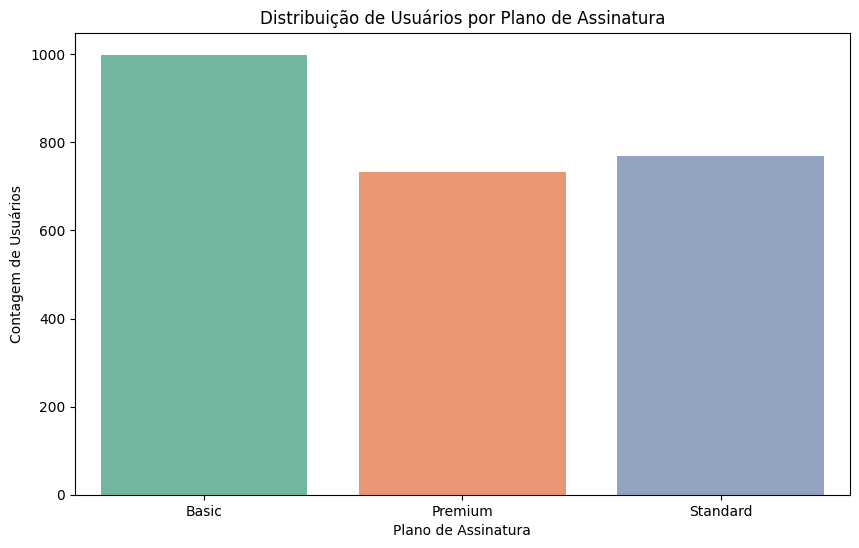

In [ ]:
# Verificar o número de usuários por tipo de assinatura (Plano)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Subscription Type', palette="Set2")
plt.title('Distribuição de Usuários por Plano de Assinatura')
plt.xlabel('Plano de Assinatura')
plt.ylabel('Contagem de Usuários')
plt.show()

## 3.2 Análise Bivariada

### 3.2.1 Distribuição dos usuários por país e pela idade mais comum (moda da idade)

**Principais Insights**

- 1) (ESCREVER O QUE FOI OBSERVADO NO GRÁFICO ABAIXO)
- 2) (ESCREVER O QUE FOI OBSERVADO NO GRÁFICO ABAIXO)

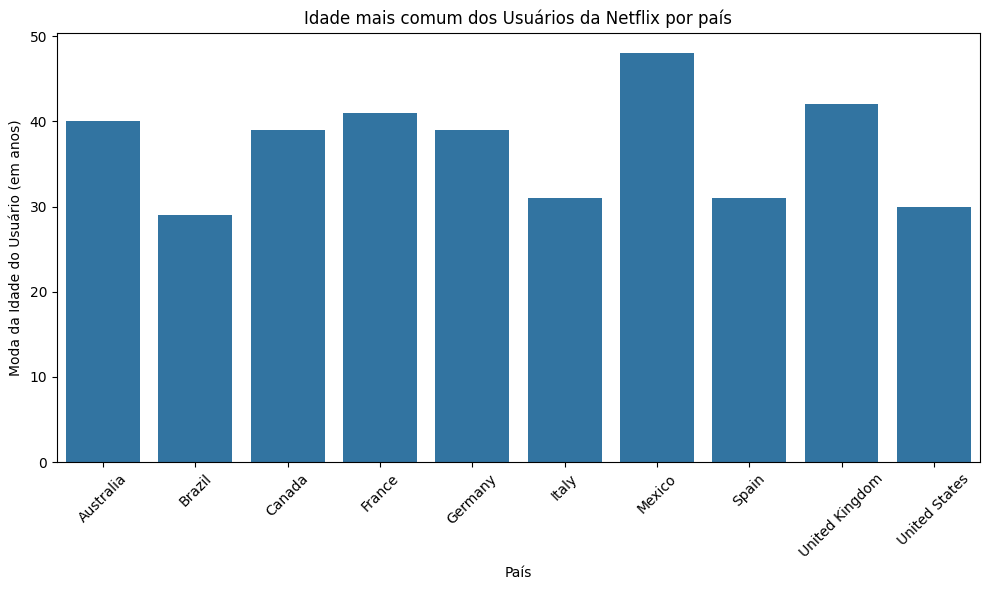

In [ ]:
moda_idade = df.groupby('Country')['Age'].agg(lambda x: x.value_counts().idxmax())

plt.figure(figsize=(10,6))
sns.barplot(data=moda_idade)
plt.title('Idade mais comum dos Usuários da Netflix por país')
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Moda da Idade do Usuário (em anos)')
plt.tight_layout()
plt.show()

### 3.2.2 Distribuição dos usuários por país e gênero

**Principais Insights**

- 1) (ESCREVER O QUE FOI OBSERVADO NO GRÁFICO ABAIXO)
- 2) (ESCREVER O QUE FOI OBSERVADO NO GRÁFICO ABAIXO)

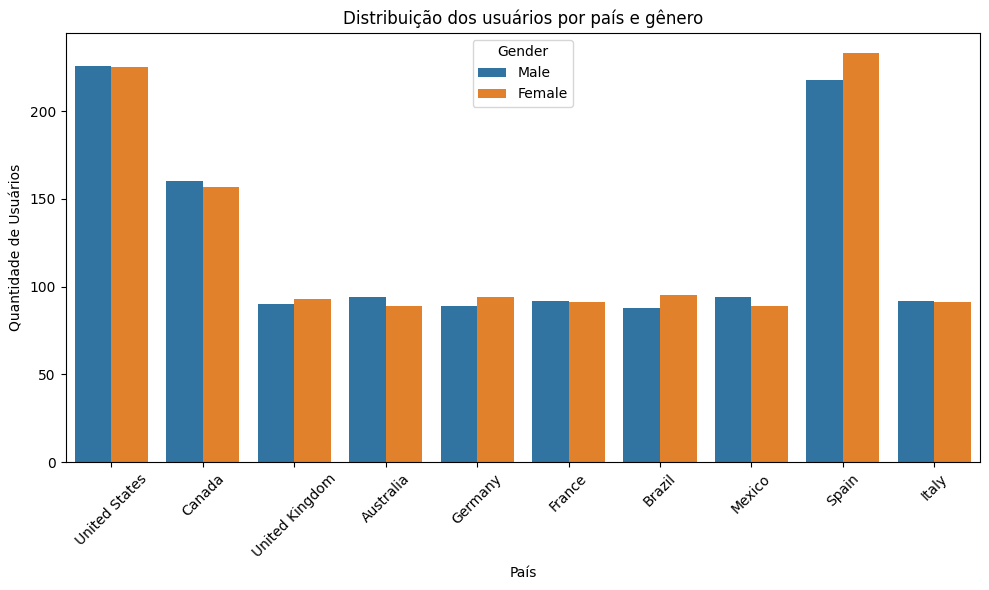

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', hue='Gender')

# Customizar o gráfico
plt.title('Distribuição dos usuários por país e gênero')
plt.ylabel('Quantidade de Usuários')
plt.xlabel('País')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### 3.2.3 Distribuição dos usuários por gênero e tipo de assinatura

**Principais Insights**

- 1) (ESCREVER O QUE FOI OBSERVADO NO GRÁFICO ABAIXO)
- 2) (ESCREVER O QUE FOI OBSERVADO NO GRÁFICO ABAIXO)

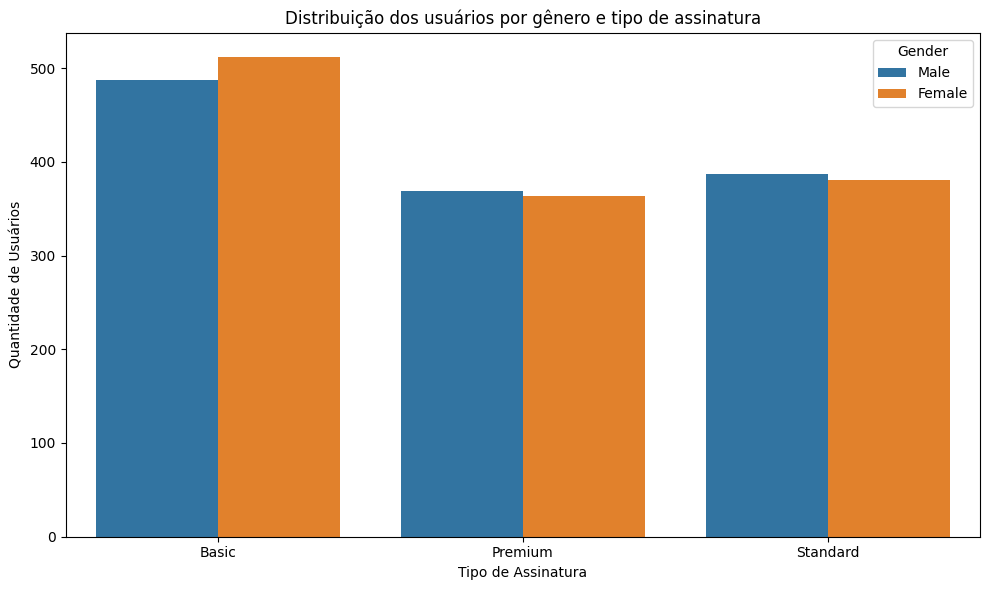

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subscription Type', hue='Gender')

# Customizar o gráfico
plt.title('Distribuição dos usuários por gênero e tipo de assinatura')
plt.ylabel('Quantidade de Usuários')
plt.xlabel('Tipo de Assinatura')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# 4. Conclusão

**Key Insights**

- (falar de forma bulshitera quais foram os principais insights extraídos e o impacto de analisar o cruzamento dos insights de cada análise entre si)



**Dificuldades Encontradas**

- (falar que poderiamos ter desenvolvidos análises mais aprofundados, caso tivesse sido fornecida variável X ou Y)



**Próximos Passos**

- (iremos focar no desenvolvimento do storytelling dos dados para a evolução do projeto aplicado + bulshitagem)